<a href="https://colab.research.google.com/github/DeveloperAkram/Colab-Notebooks/blob/master/ML7014_Multiple_Linear_Regression_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
# Load the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
# Load the Dataset and Create the Data Frame

from google.colab import drive
drive._mount('/content/akramchowdhury')

Drive already mounted at /content/akramchowdhury; to attempt to forcibly remount, call drive.mount("/content/akramchowdhury", force_remount=True).


In [190]:
df = pd.read_csv('/content/akramchowdhury/MyDrive/Colab Notebooks/ML7001 - Machine Learning Algorithms/50_Startups.csv')

In [191]:
# Check the shape of dataset

df.shape

(50, 5)

In [192]:
# View first five rows of dataset

df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [193]:
# View last five rows of dataset

df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [194]:
# View the random samples of data

df.sample(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
2,153441.51,101145.55,407934.54,Florida,191050.39
19,86419.70,153514.11,0.00,New York,122776.86
38,20229.59,65947.93,185265.10,New York,81229.06
30,61994.48,115641.28,91131.24,Florida,99937.59
23,67532.53,105751.03,304768.73,Florida,108733.99


In [195]:
# Check the Datatypes of Features

df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [196]:
# Dataframe in statistically

df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [197]:
# Information about dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c4ef485d0>,
      dtype=object)

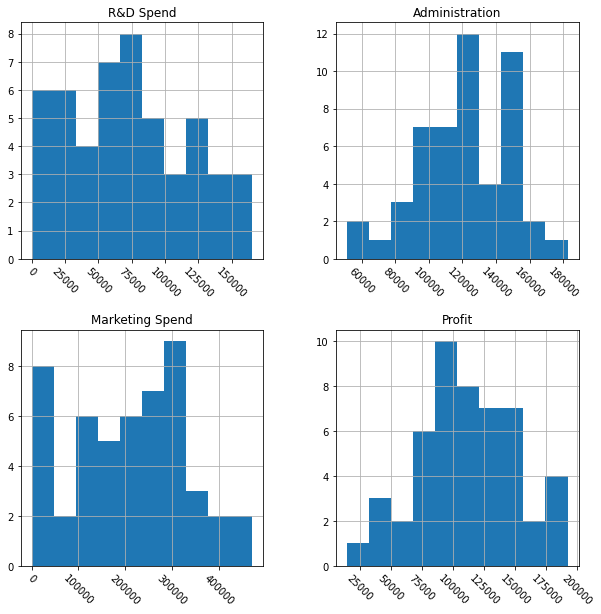

In [198]:
# Univariate Plot
# Histogram
# Plot histogram grid

df.hist(xrot= -45, figsize= (10,10))

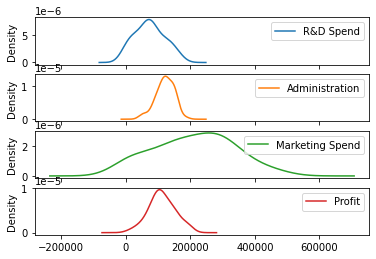

In [199]:
# Density Plots

df.plot(kind = 'density', subplots=True, sharex= True)
plt.show()

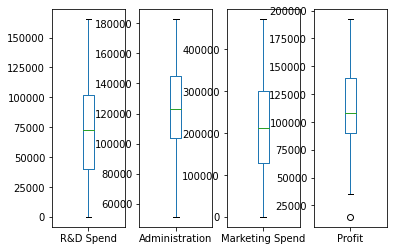

In [200]:
# Box and Whisker Plots

df.plot(kind='box', subplots= True, sharex = False, sharey= False)
plt.show()

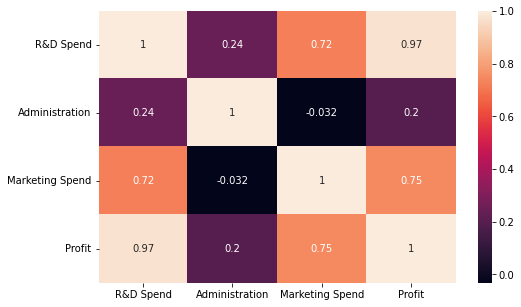

In [201]:
# Multivarirate Plots
# Correlation Matrix for finding most significant variables

plt.figure(figsize= (8,5))
correlation = df.corr().round(4)
sns.heatmap(data= correlation, annot= True)
plt.show()

In [202]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [203]:
correlation = df.corr(method= 'pearson')
print(correlation)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


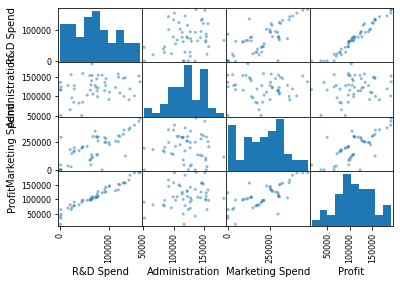

In [204]:
# Scatter Plot Matrix

from pandas.plotting import scatter_matrix

scatter_matrix(df)
plt.show()

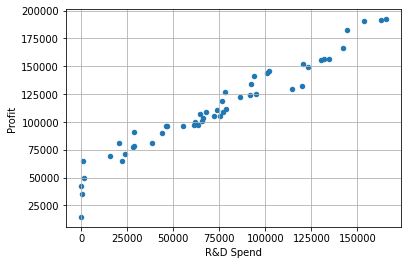

In [205]:
# Visualization b/w independent & dependent variables

df.plot.scatter(x = 'R&D Spend', y = 'Profit')
plt.grid()
plt.show()

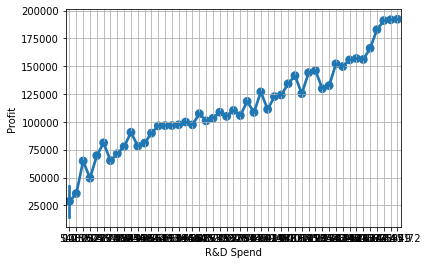

In [206]:
# the plot between Profit and R&D spend

sns.pointplot(x = 'R&D Spend', y = 'Profit', data= df)
plt.grid()
plt.show()

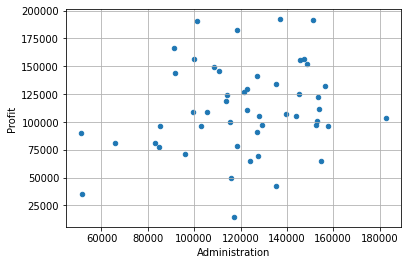

In [207]:
df.plot.scatter(x = 'Administration', y = 'Profit')
plt.grid()
plt.show()

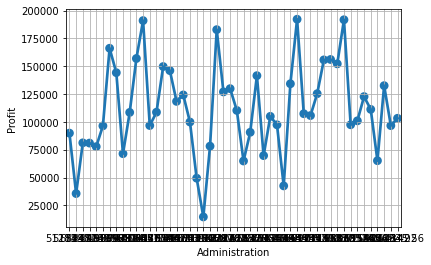

In [208]:
sns.pointplot(x = 'Administration', y = 'Profit', data= df)
plt.grid()
plt.show()

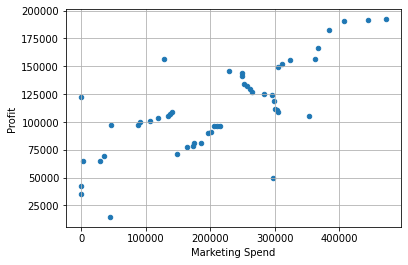

In [209]:
df.plot.scatter(x = 'Marketing Spend', y = 'Profit')
plt.grid()
plt.show()

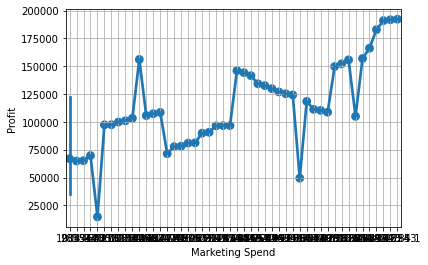

In [210]:
sns.pointplot(x = 'Marketing Spend', y = 'Profit', data= df)
plt.grid()
plt.show()

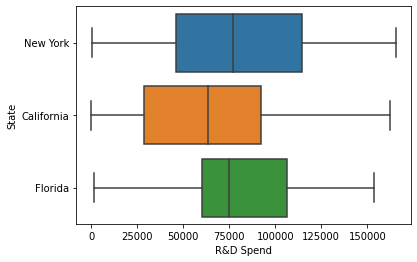

In [211]:
# Relational between CATEGORICAL & NUMERICAL Feature name

sns.boxplot(y = 'State', x = 'R&D Spend', data= df)
plt.show()

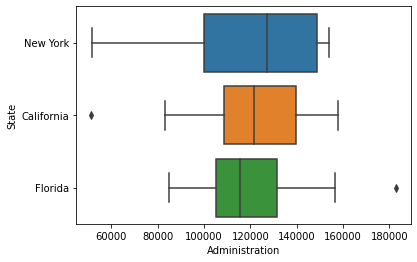

In [212]:
sns.boxplot(y = 'State', x = 'Administration', data= df)
plt.show()

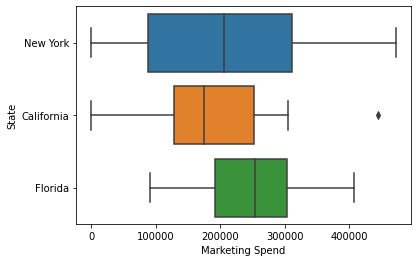

In [213]:
sns.boxplot(y = 'State', x = 'Marketing Spend', data= df)
plt.show()

In [214]:
# Data Cleaning
# Check no. of rows before removing duplicates

df.shape

(50, 5)

In [215]:
df = df.drop_duplicates()

In [216]:
df.shape

(50, 5)

In [217]:
# Check the NULL values

df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [218]:
# Feature Engineering
# Check the no. of unique labels in 'State' column

df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [219]:
# print the no. of labels for state feature

print(df.State.value_counts())

New York      17
California    17
Florida       16
Name: State, dtype: int64


In [220]:
# Create dummy variables 

dummies = pd.get_dummies(df.State)

In [221]:
dummies.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [222]:
merge = pd.concat([df, dummies], axis= 1)

In [223]:
merge.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [224]:
# Drop the State feature

df = merge.drop(['State', 'California'], axis=1)

In [225]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [226]:
df.shape

(50, 6)

In [227]:
# create dependently(y) and Independent(X) variables

traget_feature = 'Profit'

# Separate objet for target feature
y = df[traget_feature]

# Separate object for input feature
X = df.drop(traget_feature, axis= 1)

In [228]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [229]:
X.shape

(50, 5)

In [230]:
y.shape

(50,)

In [231]:
# Split Dataset to Train & Test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

In [232]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((40, 5), (10, 5), (40,), (10,))

In [233]:
# Build the Model (Linear Regression)

from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

mlr.fit(x_train, y_train)

LinearRegression()

In [234]:
# apply trained model on test dataset

x_test.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
27,72107.60,127864.55,353183.81,0,1
35,46014.02,85047.44,205517.64,0,1
40,28754.33,118546.05,172795.67,0,0
38,20229.59,65947.93,185265.10,0,1
2,153441.51,101145.55,407934.54,1,0


In [235]:
x_test.shape

(10, 5)

In [236]:
y_pred = mlr.predict(x_test)
y_pred

array([114664.4171587 ,  90593.15531618,  75692.84151576,  70221.88679649,
       179790.2551487 , 171576.9201852 ,  49753.58752024, 102276.65888937,
        58649.37795765,  98272.02561132])

In [237]:
y_pred.shape

(10,)

In [238]:
y_test

27    105008.31
35     96479.51
40     78239.91
38     81229.06
2     191050.39
3     182901.99
48     35673.41
29    101004.64
46     49490.75
31     97483.56
Name: Profit, dtype: float64

In [239]:
# compare the actual output (y_test) with predict (y_pred)

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'variance': y_test-y_pred})

In [240]:
df1.head()

,Actual,Predicted,variance
27,105008.31,114664.417159,-9656.107159
35,96479.51,90593.155316,5886.354684
40,78239.91,75692.841516,2547.068484
38,81229.06,70221.886796,11007.173204
2,191050.39,179790.255149,11260.134851


In [241]:
# Get the parameters
# Intercept (b)

mlr.intercept_
print('intercept(b) is: ', mlr.intercept_)

intercept(b) is:  49549.70730366057


In [242]:
# coefficients (m1,m2,...m5)

mlr.coef_
print('cofficient (m) is: ', mlr.coef_)

cofficient (m) is:  [ 7.74342081e-01 -9.44369585e-03  2.89183133e-02  5.82738646e+02
  2.72794662e+02]


In [243]:
# find the predicted value of any (new) independent variable

df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [244]:
# predict the index number 2

mlr.predict([[153441.51,101145.55,407934.54,1,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([179790.2551487])

In [245]:
mlr.intercept_

49549.70730366057

In [246]:
mlr.coef_

array([ 7.74342081e-01, -9.44369585e-03,  2.89183133e-02,  5.82738646e+02,
        2.72794662e+02])

In [247]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [248]:
# Evaluation metrics of regression algorithms

from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)*100
print("Score: ", score)

Score:  96.49618042059875


In [249]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  7698.119817495867
Mean Squared Error:  79495441.50424439
Root Mean Squared Error:  8916.021618650573
